# IJmuiden Cross-Current Data Exploration

This notebook loads, preprocesses, normalizes, and explores four CSV datasets: water height, wind, and freshwater discharge to measure water velocity in the cross-current. It also saves normalization parameters for later inference.

In [96]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import os
import json
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [97]:
# Set up data paths
data_dir = Path('../data')
csv_files = {
    "water_height": os.path.join(data_dir, "20250702_033.csv"),
    "wind_direction": os.path.join(data_dir, "20250702_033 2.csv"),
    "freshwater_discharge": os.path.join(data_dir, "20250702_034.csv"),
    "water_direction": os.path.join(data_dir, "20250702_033 3.csv"),
    "water_speed": os.path.join(data_dir, "20250703_018.csv"),
}

# Path to save normalization parameters
norm_params_path = os.path.join(data_dir, "norm_params.json")

In [98]:
# Only keep relevant columns
cols = ['WAARNEMINGDATUM', 'WAARNEMINGTIJD (MET/CET)', 'NUMERIEKEWAARDE', 'X', 'Y']

# Load each CSV into a dict of DataFrames with selected columns
dfs = {name: pd.read_csv(path, usecols=cols, sep=";") for name, path in csv_files.items()}

# Quick check
dfs.keys()

dict_keys(['water_height', 'wind_direction', 'freshwater_discharge', 'water_direction', 'water_speed'])

In [99]:
for name, df in dfs.items():
    print(f"\n### {name.upper()}\n")
    display(df.head())
    print(df.info())
    print(df.describe(include="all"))


### WATER_HEIGHT



,WAARNEMINGDATUM,WAARNEMINGTIJD (MET/CET),NUMERIEKEWAARDE,X,Y
0,01-01-2022,01:56:00,99,"603100,219284376","5813724,18174203"
1,01-01-2022,10:03:00,-62,"603100,219284376","5813724,18174203"
2,01-01-2022,14:17:00,98,"603100,219284376","5813724,18174203"
3,01-01-2022,22:23:00,-71,"603100,219284376","5813724,18174203"
4,02-01-2022,02:48:00,99,"603100,219284376","5813724,18174203"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558744 entries, 0 to 558743
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   WAARNEMINGDATUM           558744 non-null  object
 1   WAARNEMINGTIJD (MET/CET)  558744 non-null  object
 2   NUMERIEKEWAARDE           558744 non-null  int64 
 3   X                         558744 non-null  object
 4   Y                         558744 non-null  object
dtypes: int64(1), object(4)
memory usage: 21.3+ MB
None
       WAARNEMINGDATUM WAARNEMINGTIJD (MET/CET)  NUMERIEKEWAARDE  \
count           558744                   558744    558744.000000   
unique            3837                     1414              NaN   
top         02-03-2022                 15:10:00              NaN   
freq               153                     3848              NaN   
mean               NaN                      NaN        -6.100873   
std                NaN                   

,WAARNEMINGDATUM,WAARNEMINGTIJD (MET/CET),NUMERIEKEWAARDE,X,Y
0,01-01-2025,00:00:00,"216,5","603084,756918076","5813700,79688048"
1,01-01-2025,00:10:00,"216,7","603084,756918076","5813700,79688048"
2,01-01-2025,00:20:00,"217,5","603084,756918076","5813700,79688048"
3,01-01-2025,00:30:00,"215,9","603084,756918076","5813700,79688048"
4,01-01-2025,00:40:00,"216,8","603084,756918076","5813700,79688048"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26272 entries, 0 to 26271
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   WAARNEMINGDATUM           26272 non-null  object
 1   WAARNEMINGTIJD (MET/CET)  26272 non-null  object
 2   NUMERIEKEWAARDE           26272 non-null  object
 3   X                         26272 non-null  object
 4   Y                         26272 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB
None
       WAARNEMINGDATUM WAARNEMINGTIJD (MET/CET) NUMERIEKEWAARDE  \
count            26272                    26272           26272   
unique             183                      144            3577   
top         01-01-2025                 00:00:00       999999999   
freq               144                      183             101   

                       X                 Y  
count              26272             26272  
unique                 1                 1 

,WAARNEMINGDATUM,WAARNEMINGTIJD (MET/CET),NUMERIEKEWAARDE,X,Y
0,01-01-2025,00:00:00,"15,55","637499,067705518","5798364,14113639"
1,01-01-2025,00:10:00,"22,85","637499,067705518","5798364,14113639"
2,01-01-2025,00:20:00,"31,4","637499,067705518","5798364,14113639"
3,01-01-2025,00:30:00,"44,87","637499,067705518","5798364,14113639"
4,01-01-2025,00:40:00,"61,15","637499,067705518","5798364,14113639"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26278 entries, 0 to 26277
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   WAARNEMINGDATUM           26278 non-null  object
 1   WAARNEMINGTIJD (MET/CET)  26278 non-null  object
 2   NUMERIEKEWAARDE           26278 non-null  object
 3   X                         26278 non-null  object
 4   Y                         26278 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB
None
       WAARNEMINGDATUM WAARNEMINGTIJD (MET/CET) NUMERIEKEWAARDE  \
count            26278                    26278           26278   
unique             183                      144            9001   
top         01-01-2025                 00:00:00           24,75   
freq               144                      183              14   

                       X                 Y  
count              26278             26278  
unique                 1                 1 

,WAARNEMINGDATUM,WAARNEMINGTIJD (MET/CET),NUMERIEKEWAARDE,X,Y
0,01-01-2025,00:00:00,"220,9","603084,757","5813700,797"
1,01-01-2025,00:10:00,"228,5","603084,757","5813700,797"
2,01-01-2025,00:20:00,"221,5","603084,757","5813700,797"
3,01-01-2025,00:30:00,"231,9","603084,757","5813700,797"
4,01-01-2025,00:40:00,"288,3","603084,757","5813700,797"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102998 entries, 0 to 102997
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   WAARNEMINGDATUM           102998 non-null  object
 1   WAARNEMINGTIJD (MET/CET)  102998 non-null  object
 2   NUMERIEKEWAARDE           102998 non-null  object
 3   X                         102998 non-null  object
 4   Y                         102998 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB
None
       WAARNEMINGDATUM WAARNEMINGTIJD (MET/CET) NUMERIEKEWAARDE  \
count           102998                   102998          102998   
unique             183                      144            3962   
top         01-01-2025                 00:00:00       999999999   
freq               576                      718            1398   

                       X                 Y  
count             102998            102998  
unique                 2          

,WAARNEMINGDATUM,WAARNEMINGTIJD (MET/CET),NUMERIEKEWAARDE,X,Y
0,01-01-2025,00:00:00,",309","603084,757","5813700,797"
1,01-01-2025,00:10:00,",26","603084,757","5813700,797"
2,01-01-2025,00:20:00,",247","603084,757","5813700,797"
3,01-01-2025,00:30:00,",225","603084,757","5813700,797"
4,01-01-2025,00:40:00,",157","603084,757","5813700,797"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51649 entries, 0 to 51648
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   WAARNEMINGDATUM           51649 non-null  object
 1   WAARNEMINGTIJD (MET/CET)  51649 non-null  object
 2   NUMERIEKEWAARDE           51649 non-null  object
 3   X                         51649 non-null  object
 4   Y                         51649 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB
None
       WAARNEMINGDATUM WAARNEMINGTIJD (MET/CET) NUMERIEKEWAARDE  \
count            51649                    51649           51649   
unique             184                      144            1207   
top         01-01-2025                 00:00:00       999999999   
freq               288                      361             699   

                       X                 Y  
count              51649             51649  
unique                 2                 2 

In [100]:
# For each dataset, parse and set datetime index
for name, df in dfs.items():
    df2 = df.copy()
    dates = pd.to_datetime(
        df2['WAARNEMINGDATUM'],
        dayfirst=True,
        format='%d-%m-%Y',
        errors='raise'
    )
    times = pd.to_timedelta(df2['WAARNEMINGTIJD (MET/CET)'])
    df2['datetime'] = dates + times
    df2['datetime_unix'] =  df2['datetime'].view('int64') // 10**9
    df2.set_index('datetime', inplace=True)
    df2.drop(columns=['WAARNEMINGDATUM', 'WAARNEMINGTIJD (MET/CET)'], inplace=True)
    dfs[name] = df2

# Order the data entries by datetime
for name, df in dfs.items():
    df = df.sort_index()
    dfs[name] = df
    print(name)
    print(df.head())

# Compute the common timestamps across all datasets
common_index = None
for df in dfs.values():
    if common_index is None:
        common_index = df.index
    else:
        common_index = common_index.intersection(df.index)

print(f"Found {len(common_index)} timestamps present in every dataset.")

# Subset each DataFrame to these shared times
for name, df in dfs.items():
    dfs[name] = df.loc[common_index]
    print(f"{name}: now has {len(dfs[name])} rows")


water_height
                     NUMERIEKEWAARDE                 X                 Y  \
datetime                                                                   
2015-01-01 00:00:00               91  603100,219284376  5813724,18174203   
2015-01-01 00:10:00               91  603100,219284376  5813724,18174203   
2015-01-01 00:20:00               90  603100,219284376  5813724,18174203   
2015-01-01 00:30:00               88  603100,219284376  5813724,18174203   
2015-01-01 00:40:00               84  603100,219284376  5813724,18174203   

                     datetime_unix  
datetime                            
2015-01-01 00:00:00     1420070400  
2015-01-01 00:10:00     1420071000  
2015-01-01 00:20:00     1420071600  
2015-01-01 00:30:00     1420072200  
2015-01-01 00:40:00     1420072800  
wind_direction
                    NUMERIEKEWAARDE                 X                 Y  \
datetime                                                                  
2025-01-01 00:00:00           

In [101]:
# Convert the main numeric column (comma as decimal/thousand separator) to int
def parse_int_col(col):
    s = col.astype(str).str.replace('\.', '', regex=False)  # remove thousand separators if any
    s = s.str.replace(',', '.', regex=False)               # comma→dot
    return s.astype(float)

for name, df in dfs.items():
    df['NUMERIEKEWAARDE'] = parse_int_col(df['NUMERIEKEWAARDE'])
    df['X'] = parse_int_col(df['X'])
    df['Y'] = parse_int_col(df['Y'])
    dfs[name] = df

# Verify dtypes
for name, df in dfs.items():
    print(f"{name}: {df['NUMERIEKEWAARDE'].dtype}")

water_height: float64
wind_direction: float64
freshwater_discharge: float64
water_direction: float64
water_speed: float64


In [102]:
# strategy: drop or impute with information
dfs_clean = {}
for name, df in dfs.items():
    print(f"\nProcessing {name}:")
    print(f"   Initial shape: {df.shape}")
    print(f"   Initial NaN count: {df.isna().sum().sum()}")
    
    df2 = df.copy()
    df2 = df2.dropna()
    
    print(f"   After dropna shape: {df2.shape}")
    print(f"   Rows removed: {df.shape[0] - df2.shape[0]}")
    print(f"   Final NaN count: {df2.isna().sum().sum()}")
    
    dfs_clean[name] = df2


Processing water_height:
   Initial shape: (26358, 4)
   Initial NaN count: 0
   After dropna shape: (26358, 4)
   Rows removed: 0
   Final NaN count: 0

Processing wind_direction:
   Initial shape: (26272, 4)
   Initial NaN count: 0
   After dropna shape: (26272, 4)
   Rows removed: 0
   Final NaN count: 0

Processing freshwater_discharge:
   Initial shape: (26272, 4)
   Initial NaN count: 0
   After dropna shape: (26272, 4)
   Rows removed: 0
   Final NaN count: 0

Processing water_direction:
   Initial shape: (102974, 4)
   Initial NaN count: 0
   After dropna shape: (102974, 4)
   Rows removed: 0
   Final NaN count: 0

Processing water_speed:
   Initial shape: (51487, 4)
   Initial NaN count: 0
   After dropna shape: (51487, 4)
   Rows removed: 0
   Final NaN count: 0


In [103]:
scalers = {}
normed_dfs = {}

for name, df in dfs_clean.items():
    num_cols = df.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    df_norm = df.copy()
    df_norm[num_cols] = scaler.fit_transform(df[num_cols])

    scalers[name] = {
        "mean": dict(zip(num_cols, scaler.mean_.tolist())),
        "scale": dict(zip(num_cols, scaler.scale_.tolist()))
    }
    normed_dfs[name] = df_norm

# Save normalization parameters for inference
with open(norm_params_path, "w") as f:
    json.dump(scalers, f, indent=2)

## Exploring water_height
Summary statistics for NUMERIEKEWAARDE:
count    2.635800e+04
mean     4.582755e-18
std      1.000019e+00
min     -1.708812e+00
25%     -8.943908e-01
50%     -1.342641e-01
75%      8.430417e-01
max      2.309000e+00
Name: NUMERIEKEWAARDE, dtype: float64


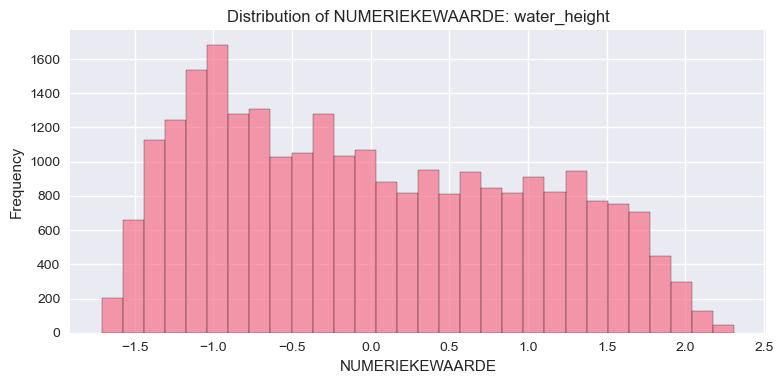

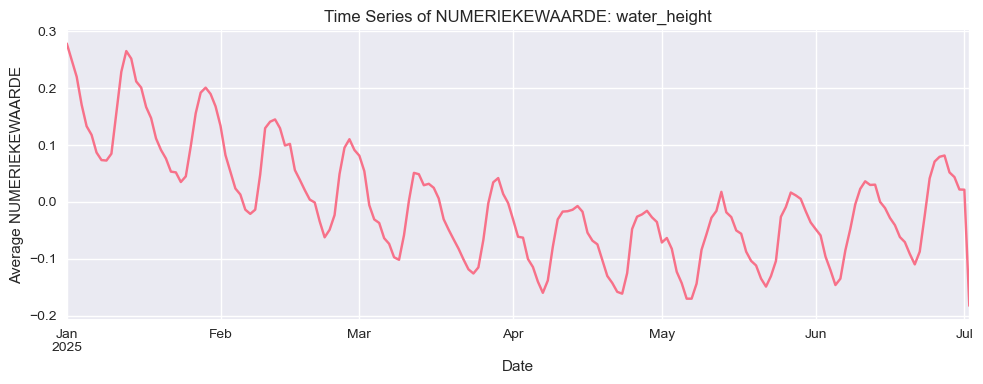

## Exploring wind_direction
Summary statistics for NUMERIEKEWAARDE:
count    2.627200e+04
mean    -1.081825e-17
std      1.000019e+00
min     -6.212553e-02
25%     -6.212412e-02
50%     -6.212252e-02
75%     -6.212152e-02
max      1.609717e+01
Name: NUMERIEKEWAARDE, dtype: float64


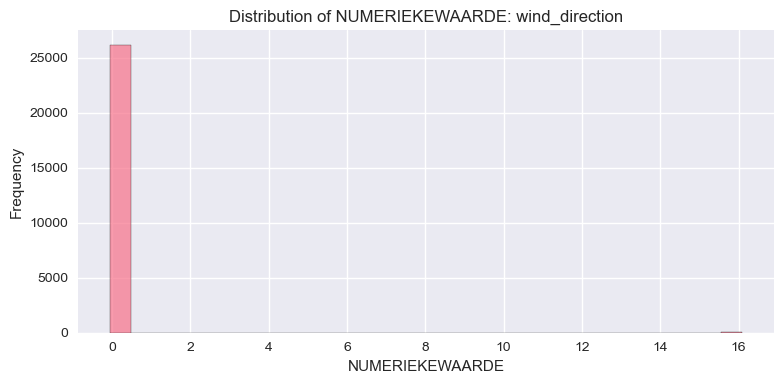

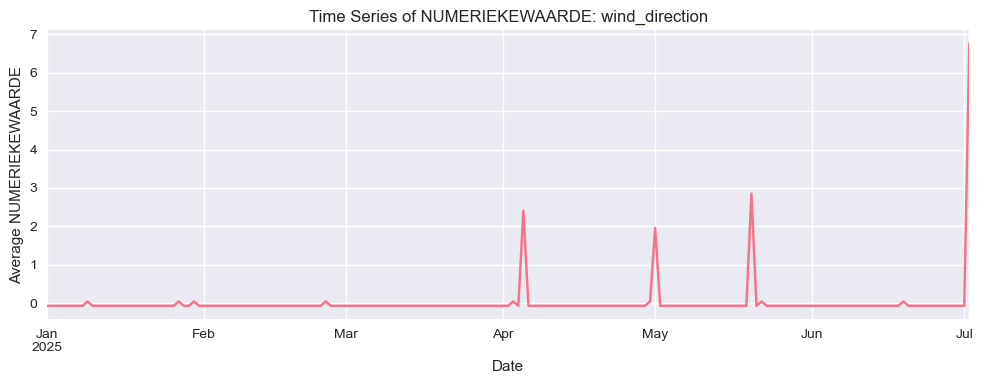

## Exploring freshwater_discharge
Summary statistics for NUMERIEKEWAARDE:
count    2.627200e+04
mean    -3.651160e-18
std      1.000019e+00
min     -1.745734e-02
25%     -1.745374e-02
50%     -1.745293e-02
75%     -1.745195e-02
max      5.729747e+01
Name: NUMERIEKEWAARDE, dtype: float64


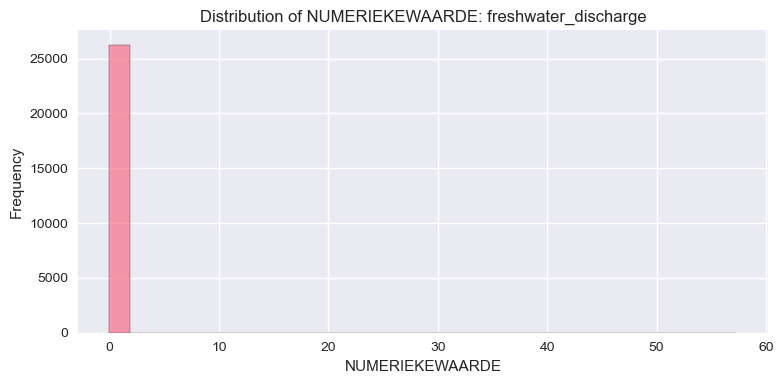

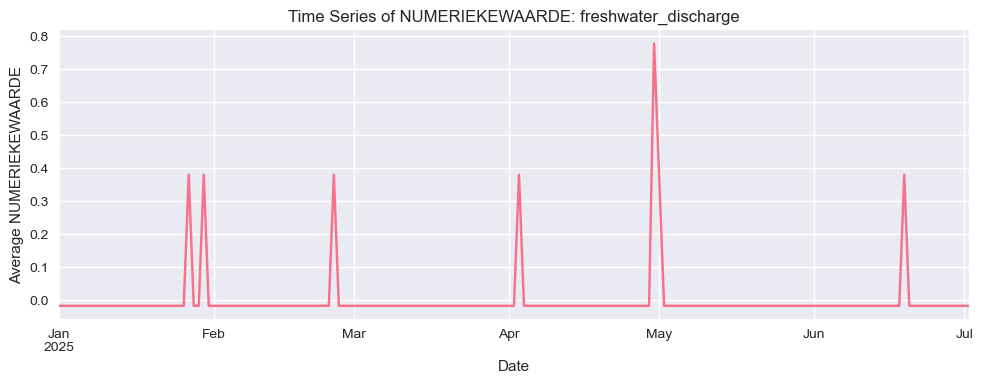

## Exploring water_direction
Summary statistics for NUMERIEKEWAARDE:
count    1.029740e+05
mean    -1.545648e-17
std      1.000005e+00
min     -1.173168e-01
25%     -1.173168e-01
50%     -1.173168e-01
75%     -1.173152e-01
max      8.523971e+00
Name: NUMERIEKEWAARDE, dtype: float64


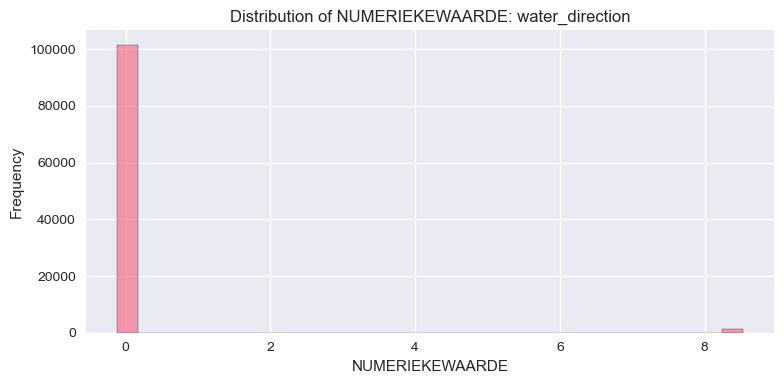

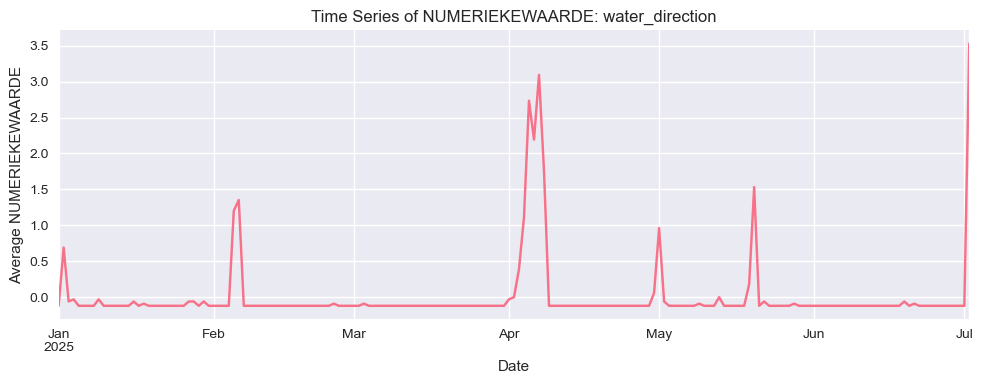

## Exploring water_speed
Summary statistics for NUMERIEKEWAARDE:
count    5.148700e+04
mean    -4.140129e-17
std      1.000010e+00
min     -1.173162e-01
25%     -1.173162e-01
50%     -1.173162e-01
75%     -1.173162e-01
max      8.523971e+00
Name: NUMERIEKEWAARDE, dtype: float64


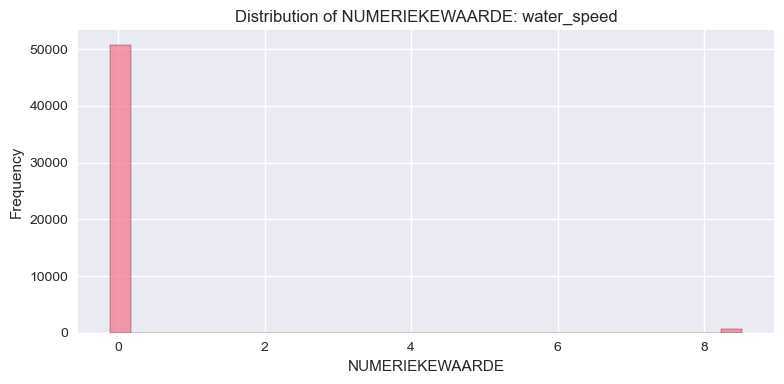

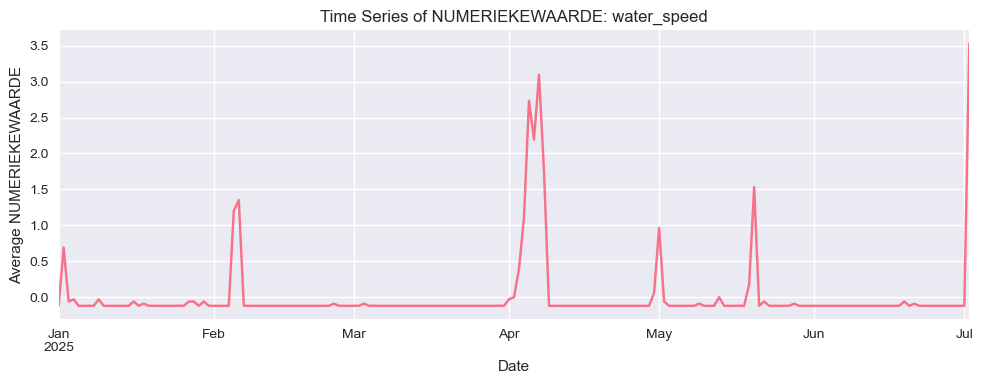

In [104]:
for name, df in normed_dfs.items():
    print(f"## Exploring {name}")

    # Summary statistics
    stats = df['NUMERIEKEWAARDE'].describe()
    print("Summary statistics for NUMERIEKEWAARDE:")
    print(stats)

    # Histogram of raw values
    plt.figure(figsize=(8,4))
    df['NUMERIEKEWAARDE'].hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of NUMERIEKEWAARDE: {name}")
    plt.xlabel('NUMERIEKEWAARDE')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Daily aggregation:
    daily = df['NUMERIEKEWAARDE'].resample('D').mean()

    # Time series line graph of daily means
    plt.figure(figsize=(10,4))
    daily.plot()
    plt.title(f"Time Series of NUMERIEKEWAARDE: {name}")
    plt.xlabel('Date')
    plt.ylabel('Average NUMERIEKEWAARDE')
    plt.tight_layout()
    plt.show()

In [105]:
# NaN check before saving
for name, df in normed_dfs.items():
    nan_count = df.isna().sum().sum()
    print(f"{name}: {nan_count} NaN values")
    
    if nan_count > 0:
        print(f"WARNING: {name} has NaN values!")

water_height: 0 NaN values
wind_direction: 0 NaN values
freshwater_discharge: 0 NaN values
water_direction: 0 NaN values
water_speed: 0 NaN values


In [106]:
processed_dir = "../data/processed"
os.makedirs(processed_dir, exist_ok=True)

for name, df in normed_dfs.items():
    df.to_csv(os.path.join(processed_dir, f"{name}_processed.csv"))